#  1st Model [predicting : whether or not it will rain tomorrow.]

In [1]:
# predict 2 things 1] rain tommrow [ categorical model ]    2] how much rain fall will be there [continious model]

In [2]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the dataset
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Pre Processing

In [4]:
df.shape

(8425, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
df.isnull().sum()/df.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

## we observe nulls are not above than 50% so we are going to treat values without dleting any columns

In [9]:
for column in df:
    print(df[column])

0       2008-12-01
1       2008-12-02
2       2008-12-03
3       2008-12-04
4       2008-12-05
           ...    
8420    2017-06-21
8421    2017-06-22
8422    2017-06-23
8423    2017-06-24
8424    2017-06-25
Name: Date, Length: 8425, dtype: object
0       Albury
1       Albury
2       Albury
3       Albury
4       Albury
         ...  
8420     Uluru
8421     Uluru
8422     Uluru
8423     Uluru
8424     Uluru
Name: Location, Length: 8425, dtype: object
0       13.4
1        7.4
2       12.9
3        9.2
4       17.5
        ... 
8420     2.8
8421     3.6
8422     5.4
8423     7.8
8424    14.9
Name: MinTemp, Length: 8425, dtype: float64
0       22.9
1       25.1
2       25.7
3       28.0
4       32.3
        ... 
8420    23.4
8421    25.3
8422    26.9
8423    27.0
8424     NaN
Name: MaxTemp, Length: 8425, dtype: float64
0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8425, dtype:

In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Imputing Null values by Using simple Imputer

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[[ 'WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']])
df[['WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow' ]] = imputer.transform(df[[ 'WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']])
df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm' ]] = imputer.transform(df[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [14]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Dropping Duplicates 

In [16]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3674,2015-10-20,Williamtown,13.1,31.6,0.000000,6.400000,11.100000,E,33.0,N,...,67.0,37.0,1021.4,1016.4,1.000000,1.000000,21.5,30.3,No,No
3675,2015-10-21,Williamtown,16.6,34.1,0.000000,6.600000,9.900000,NNW,44.0,NW,...,54.0,39.0,1014.7,1010.6,1.000000,5.000000,24.7,30.2,No,Yes
3676,2015-10-22,Williamtown,17.5,26.3,19.800000,7.800000,7.632205,SW,67.0,N,...,94.0,45.0,1012.4,1008.3,8.000000,6.000000,18.6,25.6,Yes,No
3677,2015-10-23,Williamtown,14.7,21.4,2.805913,5.389395,7.632205,S,59.0,WSW,...,90.0,48.0,1021.4,1020.9,7.000000,5.000000,15.6,20.3,No,No
3678,2015-10-24,Williamtown,11.0,22.5,2.805913,5.389395,7.632205,E,35.0,NW,...,65.0,60.0,1024.5,1021.4,4.566622,4.503183,18.4,21.4,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,2012-01-25,Melbourne,20.3,25.0,0.000000,11.600000,7.300000,S,39.0,S,...,77.0,60.0,1015.2,1014.0,8.000000,2.000000,20.8,23.8,No,No
6144,2012-01-26,Melbourne,16.1,24.5,0.000000,4.400000,12.400000,S,50.0,S,...,67.0,55.0,1018.5,1016.9,4.566622,4.503183,18.9,23.7,No,No
6145,2012-01-27,Melbourne,16.6,30.7,2.805913,8.000000,13.000000,SSE,39.0,WSW,...,69.0,55.0,1016.9,1013.5,4.566622,4.503183,20.5,26.3,No,No
6146,2012-01-28,Melbourne,20.0,30.4,2.805913,8.200000,12.100000,SSE,37.0,SW,...,64.0,55.0,1012.7,1009.2,4.566622,4.503183,24.1,27.4,No,No


In [17]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [18]:
#  check  the duplicate again
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [19]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.110016,24.096335,2.780674,5.339977,7.767098,39.144388,12.792133,17.585384,67.509082,50.478258,1017.629004,1015.142442,4.400224,4.372235,17.894035,22.704947
std,5.540673,6.130161,10.482770,3.343991,2.736693,13.382876,9.788112,9.549341,17.182723,18.498573,6.027916,5.967815,2.476781,2.324720,5.722423,5.971925
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.600000,0.000000,4.000000,7.632205,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000
50%,13.193305,23.500000,0.000000,5.389395,7.632205,39.000000,11.000000,17.000000,68.000000,50.000000,1017.640233,1015.236075,4.566622,4.503183,17.900000,22.300000
75%,17.400000,28.400000,1.200000,5.389395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


## Observations

1] there are 8425 rows and 23 columns

2] there was null values present in dataset but we treted null values by using simple imputer , strategy=mean and most frequent

3] there was duplicate values we also removed it.

4] we observe some problem in rainfall and evaporation columns because for 75% quantile range thr rainfall is 1.4 but max is directl y jump to 371 and same case in evaporation 50% and 75% quantile range it is same 5.39 but for max it directly jump to 145.

5] we observe negative value in min temp which is -2 and it is possible as column says Minimum temperaute the temperature can go in negative as well

In [16]:
print(pd.Timestamp.min)

1677-09-21 00:12:43.145224193


In [18]:
print(pd.Timestamp.max)

2262-04-11 23:47:16.854775807


In [20]:
df.Date = pd.to_datetime(df.Date, errors = 'coerce')

In [22]:
print(df.Date)

0      2008-12-01
1      2008-12-02
2      2008-12-03
3      2008-12-04
4      2008-12-05
          ...    
8420   2017-06-21
8421   2017-06-22
8422   2017-06-23
8423   2017-06-24
8424   2017-06-25
Name: Date, Length: 8425, dtype: datetime64[ns]


In [23]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


### Adding Extra columns DAY,MONTH,YEAR 

In [24]:
df['Day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [25]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [26]:
#Removing unncessary columns
df.drop([ 'Date'],axis=1,inplace = True)

In [27]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [28]:
df.Location.unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

## EDA and Visualization

********************
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
********************


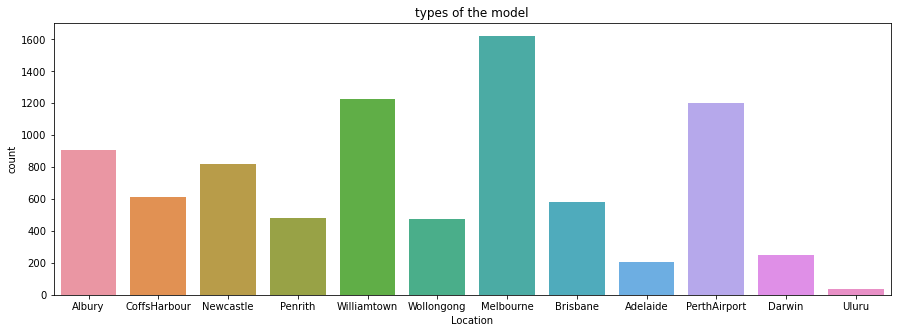

In [29]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='Location' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.Location.value_counts())
print('*'*20)
plt.show()

## From combining all the locations Melbourne city has the highest data in the dataset followed by Williamstown and Perth airport.

********************
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64
********************


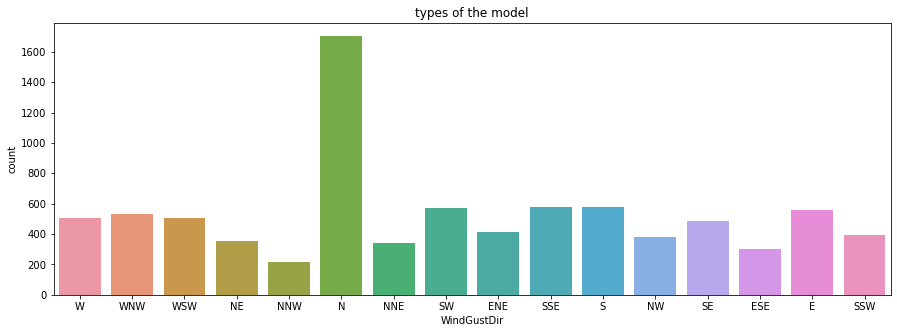

In [30]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='WindGustDir' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.WindGustDir.value_counts())
print('*'*20)
plt.show()

## From combining all the locations the Windgust Direction is higher to the north direction.

********************
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64
********************


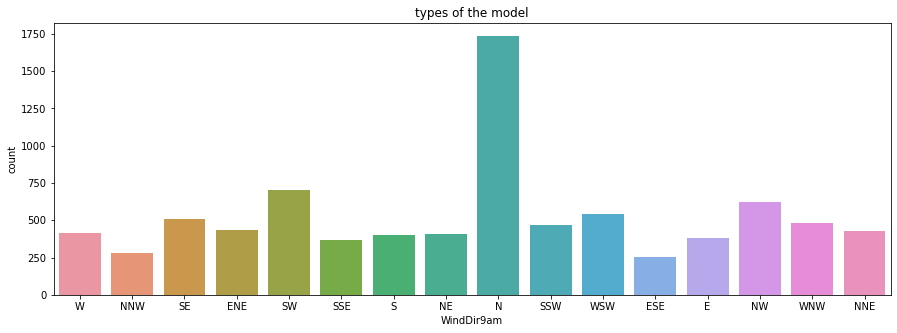

In [31]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='WindDir9am' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.WindDir9am.value_counts())
print('*'*20)
plt.show()

## From combining all the locations the Wind Direction at 9 AM is higher to the north direction.

********************
SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64
********************


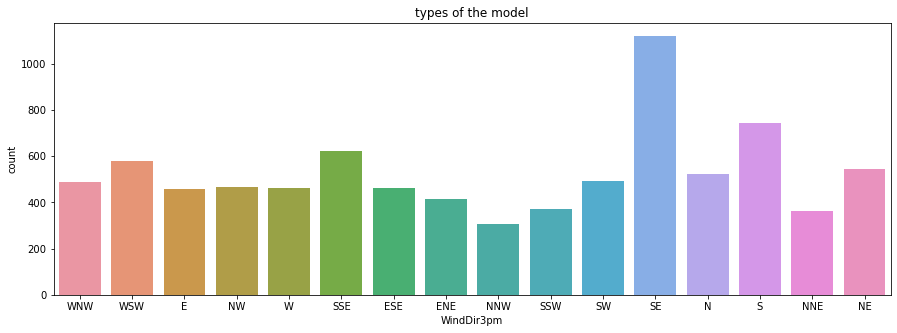

In [32]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='WindDir3pm' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.WindDir3pm.value_counts())
print('*'*20)
plt.show()

## From combining all the locations the Wind Direction at 3 PM is higher to the southeast direction.

********************
No     6434
Yes    1991
Name: RainTomorrow, dtype: int64
********************


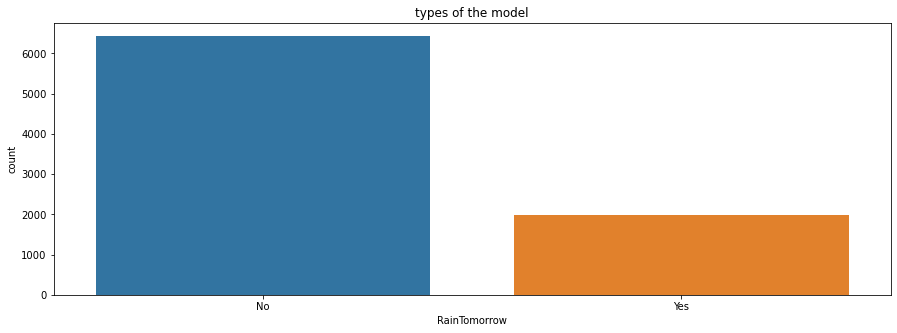

In [33]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='RainTomorrow' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.RainTomorrow.value_counts())
print('*'*20)
plt.show()

## From the above bar chart, we observe rain fall for tomorrow the no value count is 6434, and the yes value count is 1991 thus our dataset is in balance dataset.

In [34]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

Text(0.5, 1.0, 'price vs PLU4770')

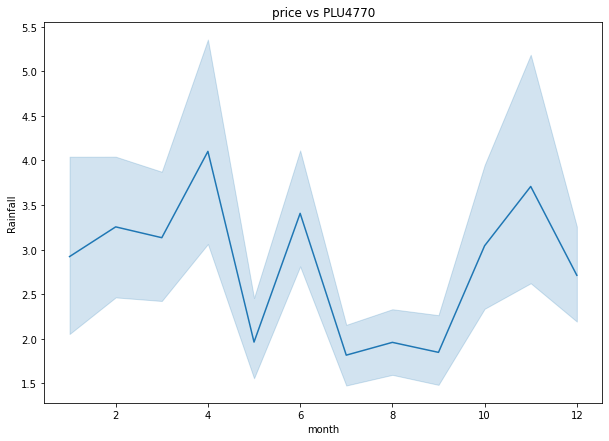

In [35]:
plt.figure(figsize=(10,7))
sns.lineplot(x='month' , y='Rainfall' , data=df)
plt.title('price vs PLU4770')

## From the above line plot we observe starting months 2 to 4 we observe more rainfall.

Text(0.5, 1.0, 'price vs PLU4770')

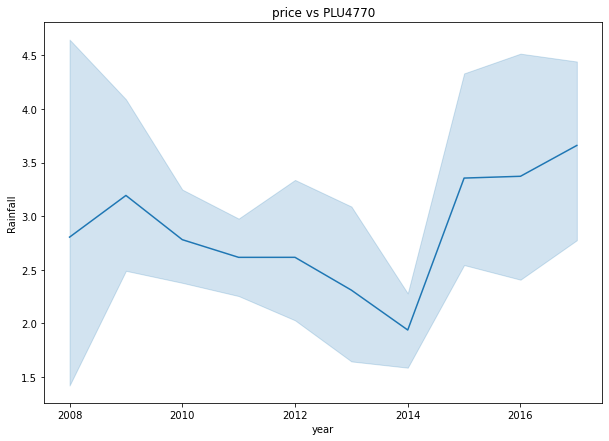

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year' , y='Rainfall' , data=df)
plt.title('price vs PLU4770')

## From the above line plot, we observe the rainfall from 2008 to 2014 was less but after 2014 we observe the rainfall suddenly increases.

Text(0.5, 1.0, 'price vs PLU4770')

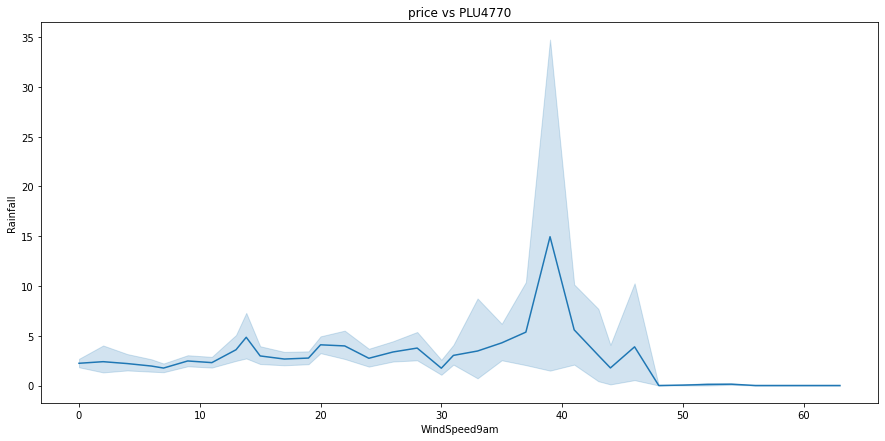

In [37]:
plt.figure(figsize=(15,7))
sns.lineplot(x='WindSpeed9am' , y='Rainfall' , data=df)
plt.title('price vs PLU4770')

## From the above line chart, we observe when windspeed at 9 am is more than 30 then the chance of rainfall is more.

Text(0.5, 1.0, 'price vs PLU4770')

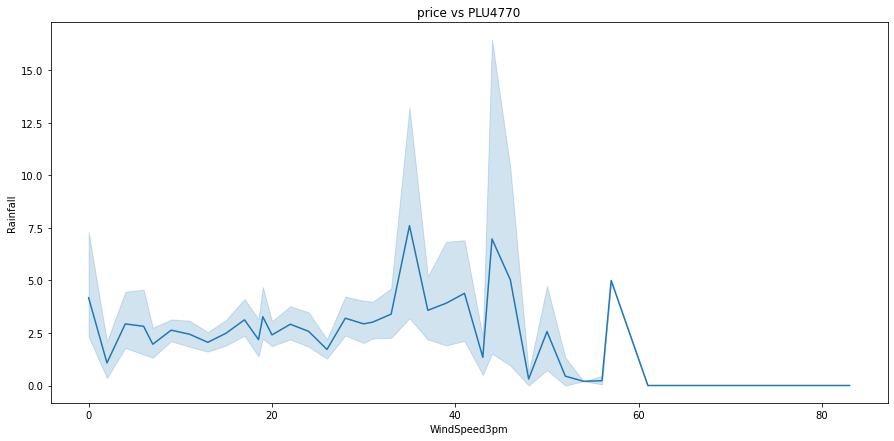

In [38]:
plt.figure(figsize=(15,7))
sns.lineplot(x='WindSpeed3pm' , y='Rainfall' , data=df)
plt.title('price vs PLU4770')

## From the above line chart, we observe if the windspeed at 3 pm is between 30-40 the chance of rain is more.

Text(0.5, 1.0, 'price vs PLU4770')

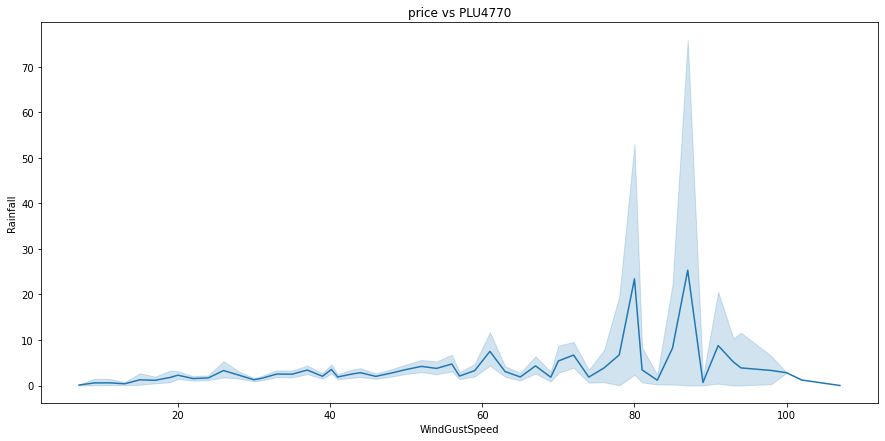

In [39]:
plt.figure(figsize=(15,7))
sns.lineplot(x='WindGustSpeed' , y='Rainfall' , data=df)
plt.title('price vs PLU4770')

## From the above line chart, we observe if wind gust speed (sudden increase in wind speed) is 70-90 then the rainfall is more.

Text(0.5, 1.0, 'price vs PLU4770')

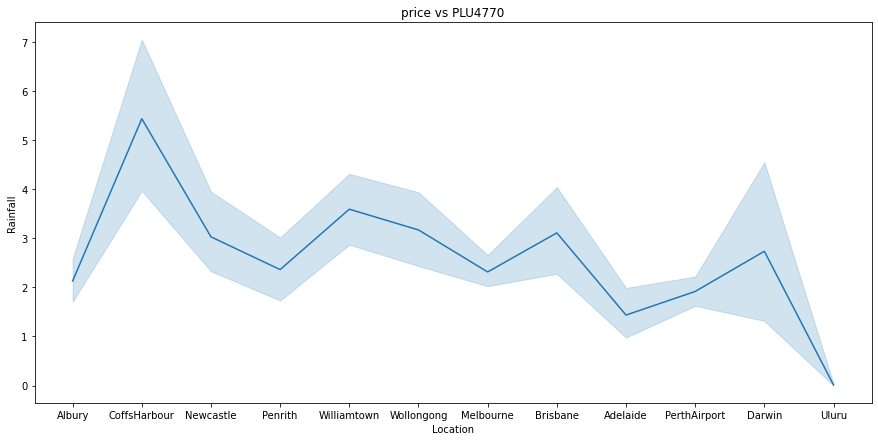

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Location' , y='Rainfall' , data=df)
plt.title('price vs PLU4770')

## From the above line chart, we observe city like Albury, Coffs harbor, and Newcastle has high rainfall as compared to Darwin, and Uluru.

Text(0.5, 1.0, 'price vs PLU4770')

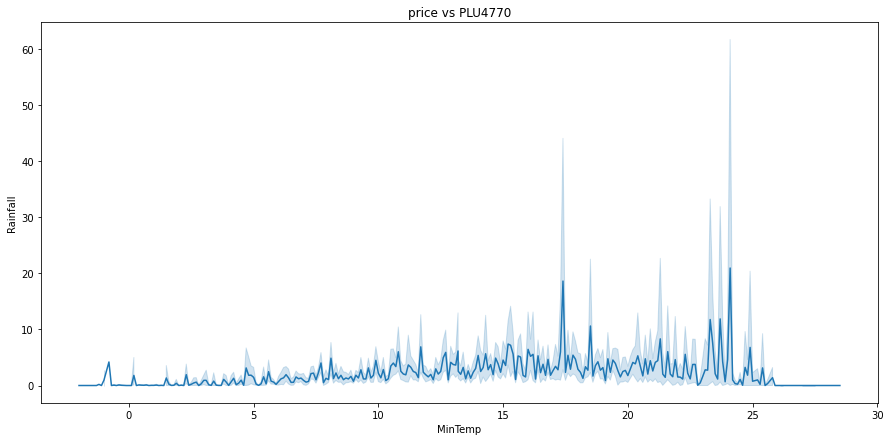

In [41]:
plt.figure(figsize=(15,7))
sns.lineplot(x='MinTemp' , y='Rainfall' , data=df)
plt.title('price vs PLU4770')

## From the above line chart, we observe when there is rainfall the minimum temperature is mostly ranging from 17 to 24 degrees Celcius.

### Checking data types of all features

In [42]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
month              int64
year               int64
dtype: object

## Applying Label Encoder to categorical columns

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()
df1=le.fit_transform(df['Location'])
pd.Series(df1)

0       1
1       1
2       1
3       1
4       1
       ..
8420    9
8421    9
8422    9
8423    9
8424    9
Length: 8425, dtype: int32

In [45]:
df['Location']=df1

In [46]:
df2=le.fit_transform(df['WindGustDir'])
pd.Series(df1)
df['WindGustDir']=df2

In [47]:
df3=le.fit_transform(df['WindDir9am'])
pd.Series(df1)
df['WindDir9am']=df3

In [48]:
df4=le.fit_transform(df['WindDir3pm'])
pd.Series(df1)
df['WindDir3pm']=df4

In [49]:
df5=le.fit_transform(df['RainToday'])
pd.Series(df1)
df['RainToday']=df5

In [50]:
df6=le.fit_transform(df['RainTomorrow'])
pd.Series(df1)
df['RainTomorrow']=df6

In [51]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Day                int64
month              int64
year               int64
dtype: object

## Plotting the heatmap to observe Co-relation

In [52]:
corr=df.corr()
corr.shape

(25, 25)

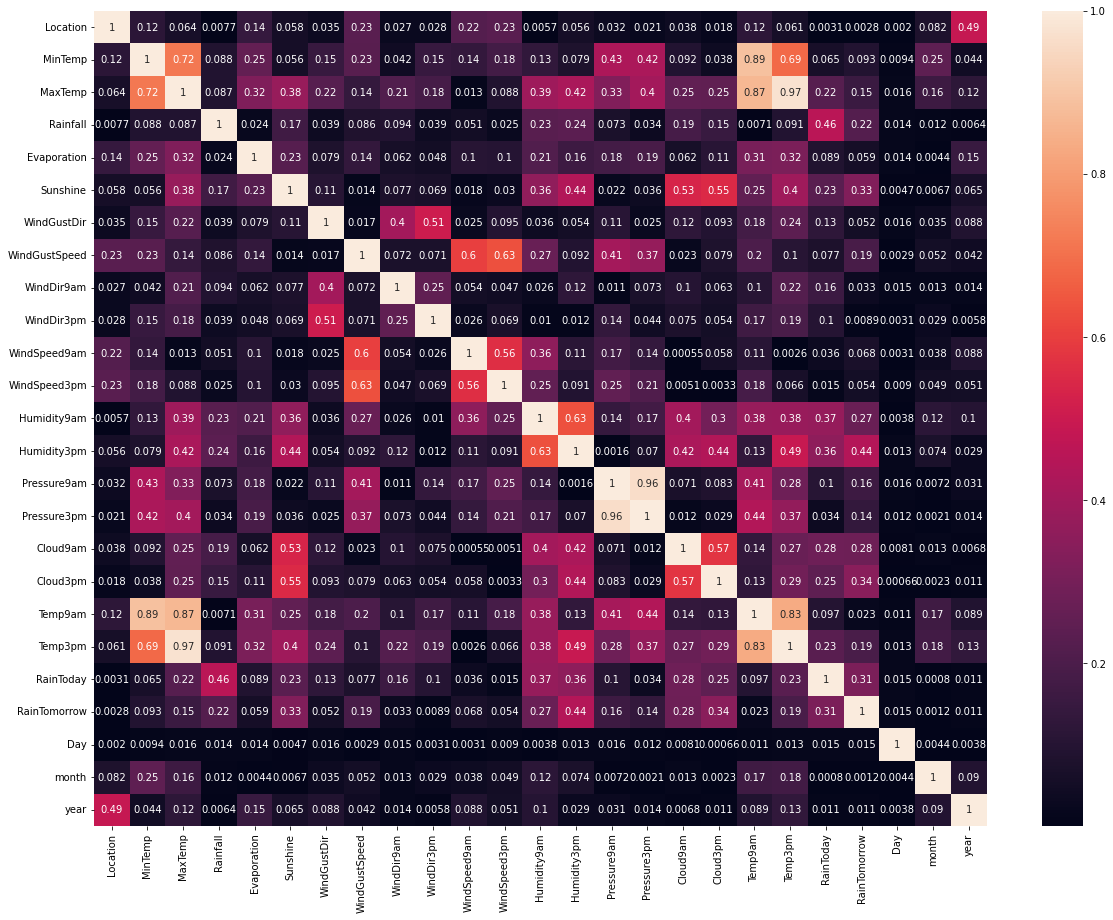

In [53]:
corr=df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

## So from the above heat map, we observe and suspect that there is a problem of multi-colinearity exists as temp9am vs Mintemp, Temp9am vs Maxtemp, Temp3pm VS Maxtemp, Temp3pm VS Temp9am and pressure9 are vs Pressure3pm are very highly co-related so we will make sure by scatter plot and if we find trend we will drop that column that contributes less to our label.

In [54]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

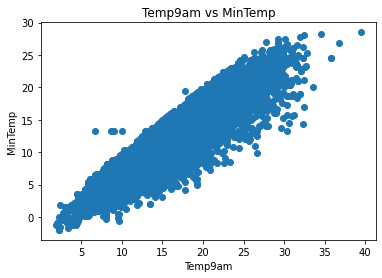

In [55]:
plt.scatter(df['Temp9am'],df['MinTemp'])
plt.xlabel('Temp9am')
plt.ylabel('MinTemp')
plt.title('Temp9am vs MinTemp')
plt.show()

## So from the above scatter plot we observe there is a trend and we are going to drop one column that contributes less to the label and that is Temp9am.

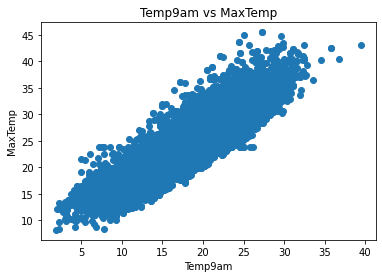

In [56]:
plt.scatter(df['Temp9am'],df['MaxTemp'])
plt.xlabel('Temp9am')
plt.ylabel('MaxTemp')
plt.title('Temp9am vs MaxTemp')
plt.show()

## So from the above scatter plot we observe there is a trend and we are going to drop one column that contributes less to the label and that is Temp9am.

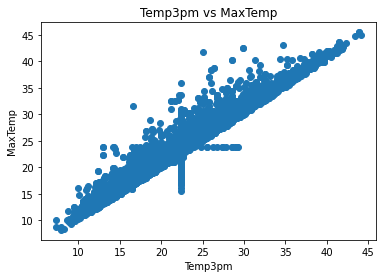

In [57]:
plt.scatter(df['Temp3pm'],df['MaxTemp'])
plt.xlabel('Temp3pm')
plt.ylabel('MaxTemp')
plt.title('Temp3pm vs MaxTemp')
plt.show()

## So from above scatter plot we observe there is a trend and we are going to drop one column that contributes less to the label and that is MaxTemp.

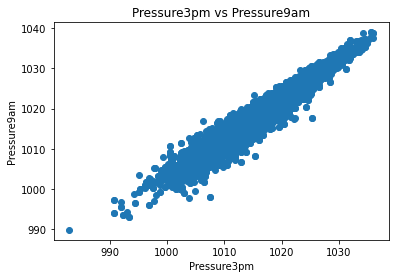

In [58]:
plt.scatter(df['Pressure3pm'],df['Pressure9am'])
plt.xlabel('Pressure3pm')
plt.ylabel('Pressure9am')
plt.title('Pressure3pm vs Pressure9am')
plt.show()

## So from the above scatter plot we observe there is a trend and we are going to drop one column that contributes less to the label and that is Pressure3pm.

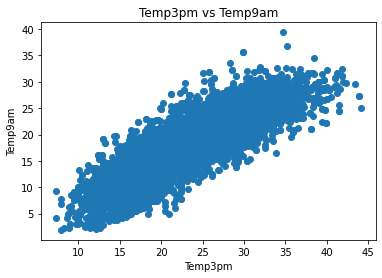

In [59]:
plt.scatter(df['Temp3pm'],df['Temp9am'])
plt.xlabel('Temp3pm')
plt.ylabel('Temp9am')
plt.title('Temp3pm vs Temp9am')
plt.show()

## So from the above scatter plot we observe there is a trend and we are going to drop one column that contributes less to the label and that is Temp9am.

## Plotting Histogram plot to see how data is distributed on an interval scale.

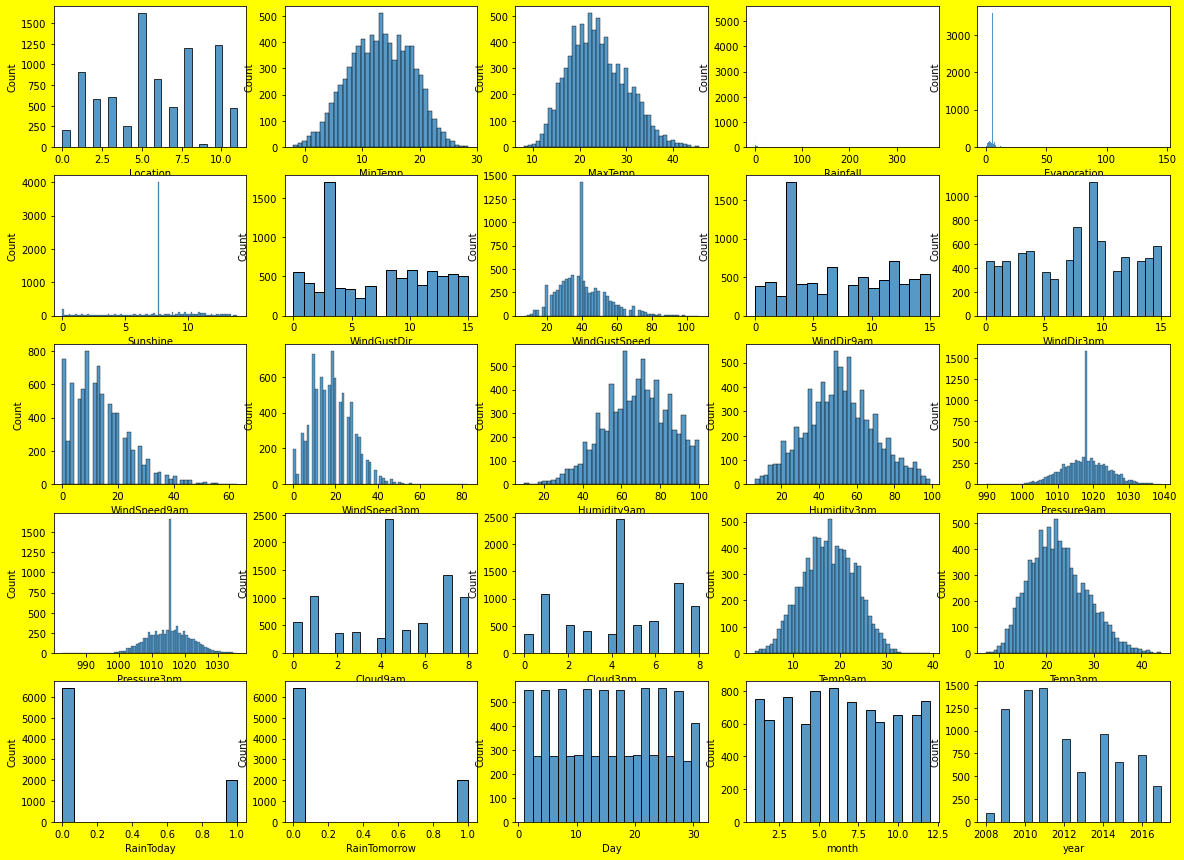

In [60]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Distribution plot to see how data is distributed

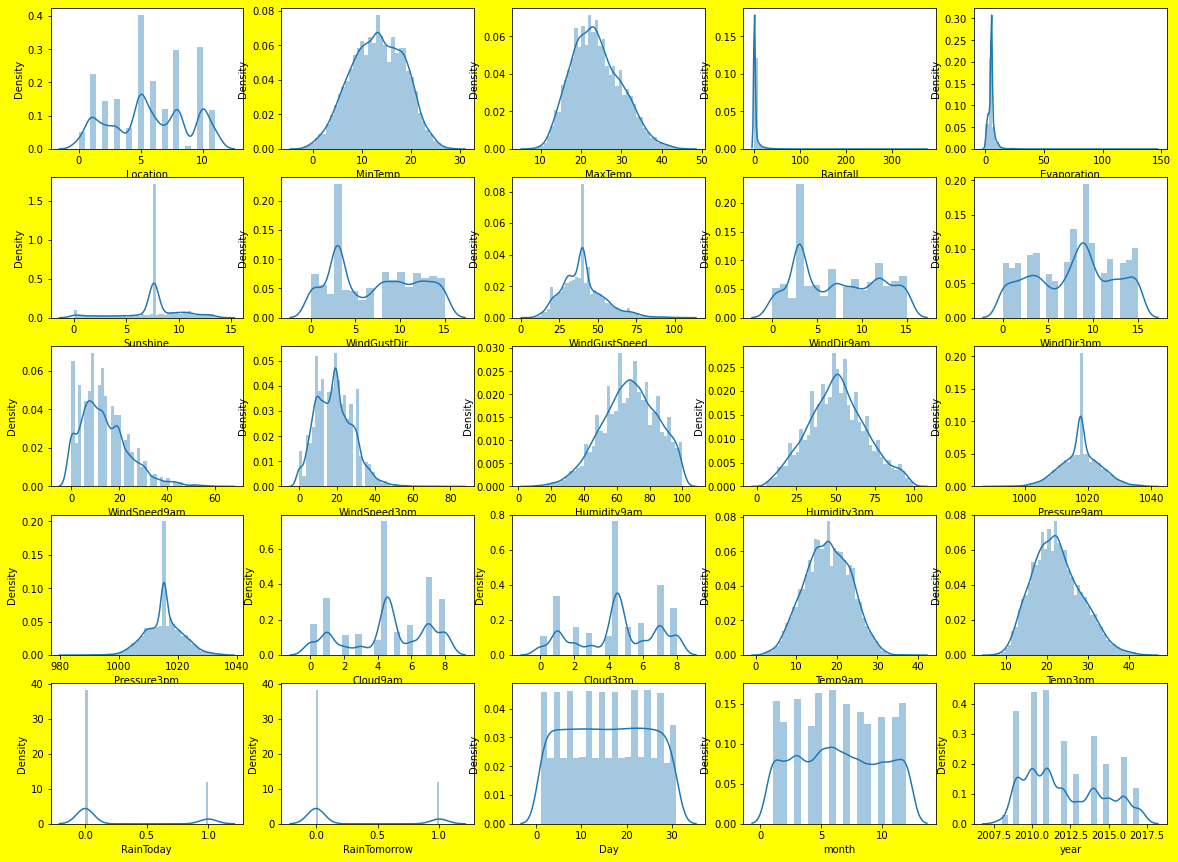

In [61]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the above histogram and distribution plot, we observe there is skewness in continuous data and the data has outliers.

In [62]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

### Seperating Feature and Label

In [63]:
X = df.drop(['RainTomorrow'],axis = 1)
y = df['RainTomorrow']

## Plotting Scatter plot to see realtion between feature and label

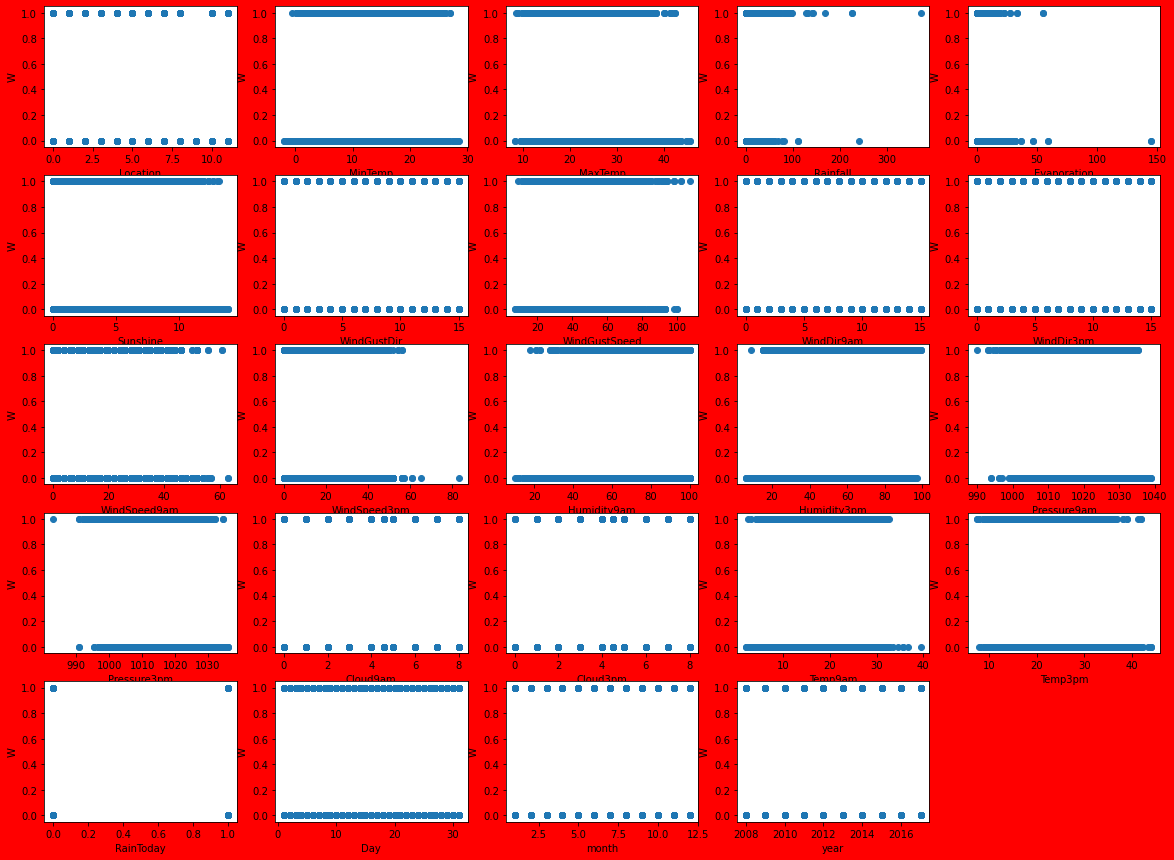

In [64]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

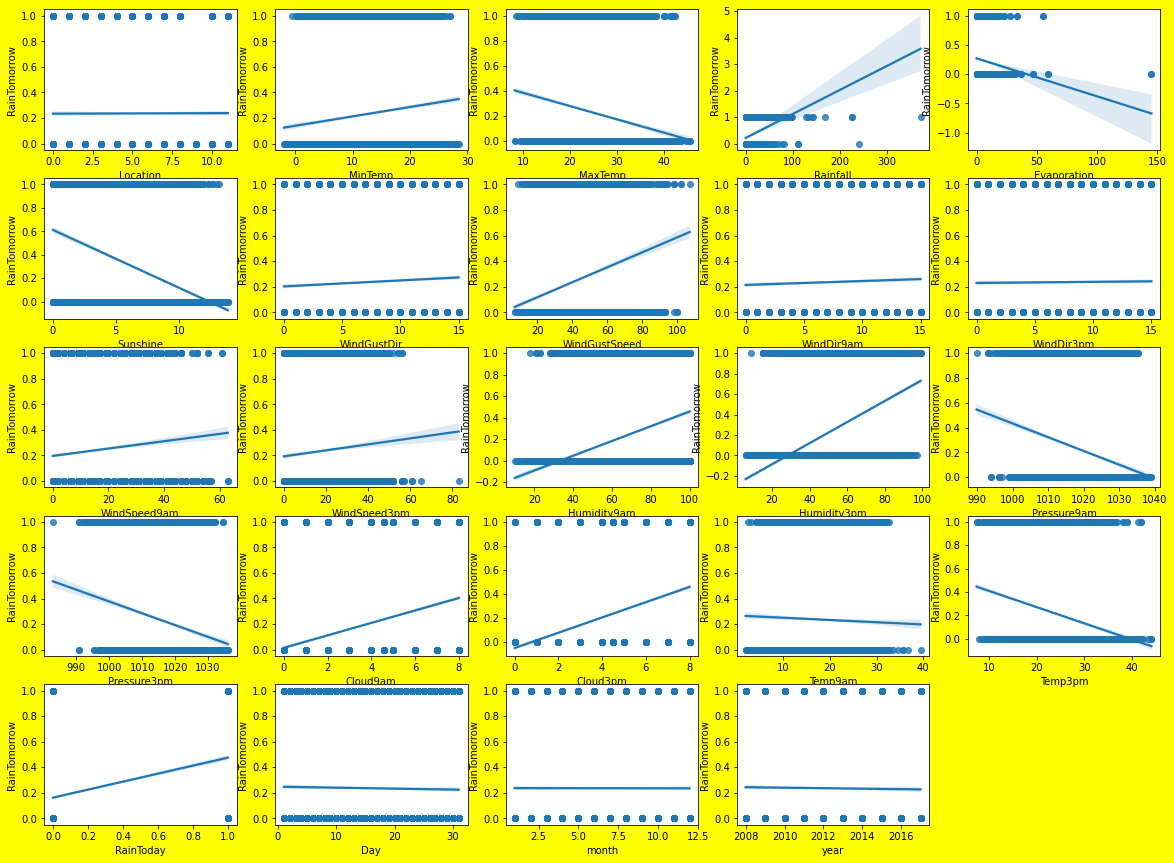

In [65]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the above scatter plot and Regression plot we observe most of the features are positively and negatively co-related to our label (RainTomorrow).

## Plotting Box plot to see outliers are present are not

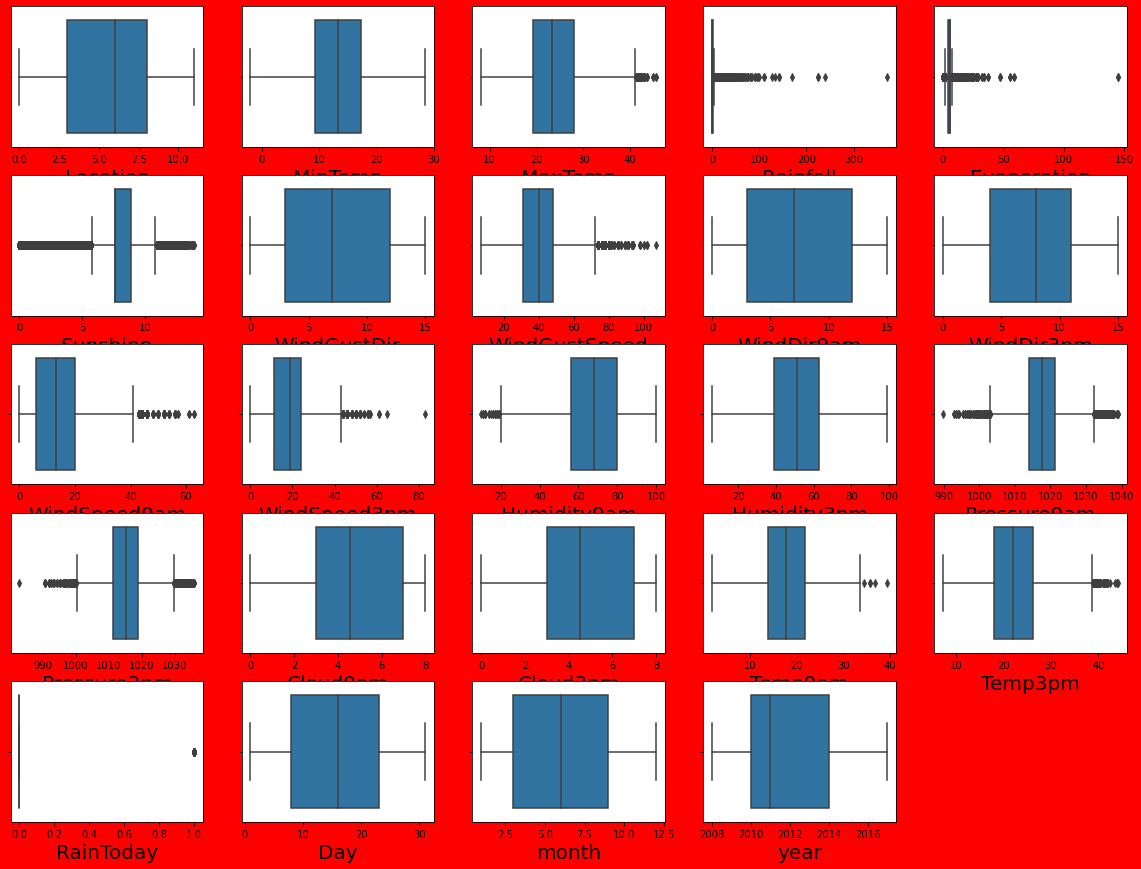

In [66]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 25:
        plt.subplot (5,5,graph)
        ax = sns.boxplot(X[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## From the above box plot, we observe most of the features having outliers, and we going to treat it with a Z score.

## Treating Outliers with Z-score Method

In [67]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [68]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.5 ).all(axis=1)

df1 = df[filtering_entry]

df1.describe()



,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
count,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,...,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000
mean,5.785121,13.032617,23.839471,1.772097,5.106577,7.936406,7.230812,38.500757,7.348019,7.785121,...,1015.543456,4.441688,4.371749,17.665091,22.464627,0.219451,0.210585,15.697562,6.406761,2012.149626
std,3.166825,5.270767,5.659187,4.289140,2.134378,2.435997,4.688369,11.694264,4.567565,4.398907,...,5.494563,2.418499,2.273250,5.368009,5.503996,0.413904,0.407752,8.801199,3.406865,2.472137
min,0.000000,-0.100000,8.800000,0.000000,0.000000,0.600000,0.000000,7.000000,0.000000,0.000000,...,999.700000,0.000000,0.000000,4.100000,7.900000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,3.000000,9.100000,19.600000,0.000000,4.000000,7.632205,3.000000,30.000000,3.000000,4.000000,...,1012.300000,3.000000,3.000000,13.800000,18.500000,0.000000,0.000000,8.000000,3.000000,2010.000000
50%,6.000000,13.193305,23.400000,0.000000,5.389395,7.632205,7.000000,39.000000,7.000000,8.000000,...,1015.236075,4.566622,4.503183,17.762015,22.200000,0.000000,0.000000,16.000000,6.000000,2012.000000
75%,8.000000,17.100000,27.900000,1.000000,5.389395,9.100000,11.000000,44.000000,12.000000,11.000000,...,1018.900000,7.000000,6.000000,21.700000,26.200000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,26.200000,39.000000,28.400000,14.800000,13.900000,15.000000,74.000000,15.000000,15.000000,...,1030.700000,8.000000,8.000000,31.500000,37.300000,1.000000,1.000000,31.000000,12.000000,2017.000000


## Scaling the data

In [71]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF

In [72]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.561195,Location
1,8.508145,MinTemp
2,26.411141,MaxTemp
3,1.314567,Rainfall
4,1.211523,Evaporation
5,1.830262,Sunshine
6,1.597337,WindGustDir
7,2.418378,WindGustSpeed
8,1.347192,WindDir9am
9,1.486463,WindDir3pm


### Removing The features whose VIF is More than 5

In [73]:
X = df.drop(['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday'],axis = 1)

In [74]:
X.columns

Index(['Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

In [75]:
X = df.drop(['RainTomorrow','MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday'],axis = 1)
y = df['RainTomorrow']

## Finding correlation between feature n lable using CORR method

In [76]:
#  (code type      --   feature corrwith label)

df.drop('RainTomorrow' , axis =1 ).corrwith (df.RainTomorrow)

Location         0.002824
MinTemp          0.092942
MaxTemp         -0.152886
Rainfall         0.220021
Evaporation     -0.059012
Sunshine        -0.327731
WindGustDir      0.051832
WindGustSpeed    0.190127
WindDir9am       0.032860
WindDir3pm       0.008918
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
Humidity9am      0.271222
Humidity3pm      0.444808
Pressure9am     -0.163985
Pressure3pm     -0.135242
Cloud9am         0.278943
Cloud3pm         0.344369
Temp9am         -0.023211
Temp3pm         -0.193805
RainToday        0.312929
Day             -0.015461
month           -0.001243
year            -0.011066
dtype: float64

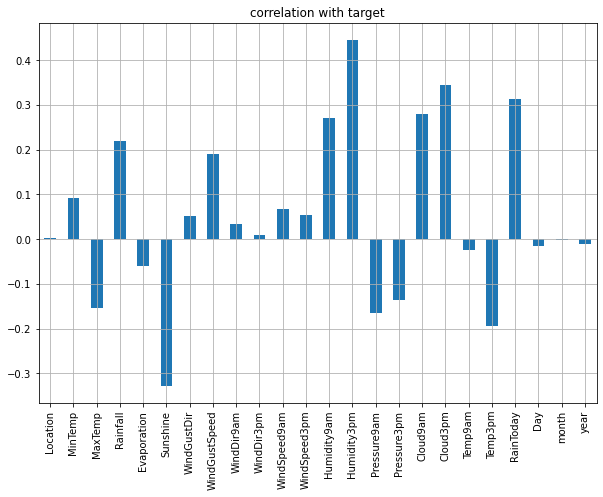

In [77]:
# convert above numbers into graph for better understanding
df.drop('RainTomorrow' , axis = 1).corrwith (df.RainTomorrow).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

## Feature selection with SelectKBest

In [78]:
# selecting 14 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

In [79]:
#select best feature
# selecting 14 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

best_feature = SelectKBest(score_func=f_classif , k=14)

fit = best_feature.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_column = pd.DataFrame(X.columns)

feature_scores = pd.concat ([df_column , df_scores ] , axis =1)

feature_scores.columns=['Feature_Name' , 'Scores']

print (feature_scores.nlargest (14 , 'Scores'))

     Feature_Name       Scores
12    Humidity3pm  2077.580374
14       Cloud3pm  1133.279550
4        Sunshine  1013.558821
13       Cloud9am   710.684993
11    Humidity9am   668.806828
2        Rainfall   428.495920
6   WindGustSpeed   315.894957
1         MinTemp    73.393560
9    WindSpeed9am    39.459412
3     Evaporation    29.434515
10   WindSpeed3pm    24.239735
5     WindGustDir    22.690229
7      WindDir9am     9.104906
15            Day     2.013973


In [80]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'month', 'year'],
      dtype='object')

## we selected top 14 feature from feature selection technique

In [81]:
#Model BUilding
new_X = df[['MinTemp','Humidity3pm','Cloud3pm','Sunshine','Cloud9am','Humidity9am','Rainfall','WindGustSpeed','MinTemp','WindSpeed9am','Evaporation','WindSpeed3pm','WindGustDir','WindDir9am','Day' ]]

In [82]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

# DecisionTreeClassifier Model

In [185]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Finding the Best Random State

In [186]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8277171333649739 RandomState 1


MAXINING TESTING SCORE 0.8277171333649739 ON RANDOM STATE OF 1
Testing Accuracy 0.8490745135263408 RandomState 2


MAXINING TESTING SCORE 0.8490745135263408 ON RANDOM STATE OF 2
Testing Accuracy 0.8462268628381585 RandomState 3


Testing Accuracy 0.8414807783578547 RandomState 4


Testing Accuracy 0.8490745135263408 RandomState 5


Testing Accuracy 0.8300901756051258 RandomState 6


Testing Accuracy 0.832937826293308 RandomState 7


Testing Accuracy 0.8353108685334599 RandomState 8


Testing Accuracy 0.8248694826767916 RandomState 9


Testing Accuracy 0.8305647840531561 RandomState 10


Testing Accuracy 0.8343616516373992 RandomState 11


Testing Accuracy 0.8305647840531561 RandomState 12


Testing Accuracy 0.8234456573327005 RandomState 13


Testing Accuracy 0.8362600854295207 RandomState 14


Testing Accuracy 0.8391077361177028 RandomState 15


Testing Accuracy 0.8419553868058851 RandomState 16


Testing Accuracy 0.8400569530137636 

In [187]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8585666824869482 On Random State 39


### Training the model

In [188]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=39)

In [189]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [190]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [191]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 85.382060%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.89      0.91      0.90      1570
           1       0.73      0.68      0.70       537

    accuracy                           0.85      2107
   macro avg       0.81      0.80      0.80      2107
weighted avg       0.85      0.85      0.85      2107



## Model Score
* Training Score = 100.000000%
* Testing Score = 85.904129%

## Hyperparameter For DecisionTree Classifier

In [192]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [193]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [194]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [195]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [203]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 10, min_samples_leaf= 1, min_samples_split= 2)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=10)

In [204]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 91.880342%
====Testing Score====
Accuracy score : 83.768391%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.86      0.94      0.90      1570
           1       0.75      0.54      0.63       537

    accuracy                           0.84      2107
   macro avg       0.80      0.74      0.76      2107
weighted avg       0.83      0.84      0.83      2107



## Model Scores With Hyperparameter Tuning
* Training Score = 91.880342%
* Testing Score = 83.768391%

## Cross-Validation Score For DecisionTree Classifier

In [205]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_dt,X_scalar,y,cv=6)

array([0.78434164, 0.73005698, 0.7991453 , 0.85470085, 0.8525641 ,
       0.81837607])

In [206]:
cross_val_score(clf_dt,X_scalar,y,cv=6).mean()

0.8081932489109239

## Confusion Matrix DecisionTree Classifier

In [109]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1503,   93],
       [ 263,  248]], dtype=int64)

# RandomForest Classifier Model

In [110]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Finding the Best Random State

In [111]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8908400569530137 RandomState 1


MAXINING TESTING SCORE 0.8908400569530137 ON RANDOM STATE OF 1
Testing Accuracy 0.8917892738490745 RandomState 2


MAXINING TESTING SCORE 0.8917892738490745 ON RANDOM STATE OF 2
Testing Accuracy 0.8813478879924063 RandomState 3


Testing Accuracy 0.8970099667774086 RandomState 4


MAXINING TESTING SCORE 0.8970099667774086 ON RANDOM STATE OF 4
Testing Accuracy 0.889890840056953 RandomState 5


Testing Accuracy 0.8837209302325582 RandomState 6


Testing Accuracy 0.8818224964404366 RandomState 7


Testing Accuracy 0.8841955386805885 RandomState 8


Testing Accuracy 0.8965353583293783 RandomState 9


Testing Accuracy 0.8889416231608923 RandomState 10


Testing Accuracy 0.8951115329852871 RandomState 11


Testing Accuracy 0.8879924062648316 RandomState 12


Testing Accuracy 0.8913146654010441 RandomState 13


Testing Accuracy 0.8989084005695301 RandomState 14


MAXINING TESTING SCORE 0.8989084005695301 ON RANDOM STATE OF 14
Testing Accurac

In [112]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9074513526340768 On Random State 42


### Training the model

In [113]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=42)

In [114]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [115]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [116]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 89.938301%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.91      0.96      0.94      1632
           1       0.84      0.68      0.75       475

    accuracy                           0.90      2107
   macro avg       0.88      0.82      0.85      2107
weighted avg       0.90      0.90      0.90      2107



## Model Scores 
* Training Score = 100.000000%
* Testing Score = 89.938301%

## Hyperparameter For RandomForestClassifier

In [117]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [118]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [119]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [120]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 4}


In [125]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'entropy', max_depth = 15, min_samples_leaf= 2, min_samples_split= 3,n_estimators= 10)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10)

In [126]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 95.552390%
====Testing Score====
Accuracy score : 88.704319%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.90      0.96      0.93      1632
           1       0.83      0.63      0.72       475

    accuracy                           0.89      2107
   macro avg       0.86      0.80      0.82      2107
weighted avg       0.88      0.89      0.88      2107



## Model Scores With Hyperparameter Tuning
* Training Score = 95.552390%
* Testing Score = 88.704319%

## Cross-Validation Score For RandomForestClassifier

In [127]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,X_scalar,y,cv=6)

array([0.83629893, 0.8005698 , 0.81837607, 0.89316239, 0.89458689,
       0.83760684])

In [128]:
cross_val_score(rf,X_scalar,y,cv=6).mean()

0.8517527450801471

## Confusion Matrix RandomForestClassifier

In [134]:
### if you want to check confusion matrix

y_pred=rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1569,   63],
       [ 175,  300]], dtype=int64)

# Support Vector Machine Model

In [135]:
# Import necessary model #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# svc model 
# for classification
from sklearn.svm import SVC

### Finding the Best Random State

In [136]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    svc=SVC()
    svc.fit(X_train_ns,y_train_ns)
    
    y_pred=svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8324632178452777 RandomState 1


MAXINING TESTING SCORE 0.8324632178452777 ON RANDOM STATE OF 1
Testing Accuracy 0.8391077361177028 RandomState 2


MAXINING TESTING SCORE 0.8391077361177028 ON RANDOM STATE OF 2
Testing Accuracy 0.8324632178452777 RandomState 3


Testing Accuracy 0.8429046037019459 RandomState 4


MAXINING TESTING SCORE 0.8429046037019459 ON RANDOM STATE OF 4
Testing Accuracy 0.8310393925011865 RandomState 5


Testing Accuracy 0.8438538205980066 RandomState 6


MAXINING TESTING SCORE 0.8438538205980066 ON RANDOM STATE OF 6
Testing Accuracy 0.8338870431893688 RandomState 7


Testing Accuracy 0.8239202657807309 RandomState 8


Testing Accuracy 0.8395823445657332 RandomState 9


Testing Accuracy 0.8381585192216422 RandomState 10


Testing Accuracy 0.8538205980066446 RandomState 11


MAXINING TESTING SCORE 0.8538205980066446 ON RANDOM STATE OF 11
Testing Accuracy 0.8348362600854295 RandomState 12


Testing Accuracy 0.8367346938775511 RandomState 13


Test

In [137]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8604651162790697 On Random State 81


### Training the model

In [138]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=81)

In [139]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [140]:
clf_svc=SVC()
clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [141]:
# call the function
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 85.390947%
====Testing Score====
Accuracy score : 86.046512%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.87      0.96      0.91      1641
           1       0.78      0.51      0.62       466

    accuracy                           0.86      2107
   macro avg       0.83      0.74      0.77      2107
weighted avg       0.85      0.86      0.85      2107



## Model Scores 
* Training Score = 85.390947%
* Testing Score = 86.046512%

## Hyperparameter Tuning for SVC

In [142]:
## HYPERPARAMETER TUNING ##
# here we tune only 2 parameter c and gamma
# where c = how much error we allow model to do 
# gamma = it decide how much curvature we want in a decision boundary 

from sklearn.model_selection import GridSearchCV

In [143]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [144]:
# here we are define some parameter and ask gridsearchcv which one is best
gridsearch=GridSearchCV(svc,param_grid)

In [145]:
#pass dataset to train 
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [146]:
#best parameters
gridsearch.best_params_

{'C': 20, 'gamma': 0.02}

In [153]:
# update our model and train again for new score 
svc=SVC(C=20,gamma=0.02)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.02)

In [154]:
# call the function
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 85.517569%
====Testing Score====
Accuracy score : 85.476981%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.87      0.95      0.91      1641
           1       0.76      0.50      0.60       466

    accuracy                           0.85      2107
   macro avg       0.82      0.73      0.76      2107
weighted avg       0.85      0.85      0.84      2107



## Model Scores With Hyperparameter Tuning
* Training Score = 85.517569%
* Testing Score = 85.476981%

## Cross-Validation Score For SVC

In [155]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc,X_scalar,y,cv=6)

array([0.84483986, 0.81267806, 0.79487179, 0.83119658, 0.84259259,
       0.84401709])

In [156]:
cross_val_score(svc,X_scalar,y,cv=6).mean()

0.828365997167895

## Confusion Matrix for SVC

In [161]:
### if you want to check confusion matrix

y_pred=svc.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1567,   74],
       [ 232,  234]], dtype=int64)

# KNeighborsClassifier Model

In [162]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Finding the Best Random State

In [163]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.9411485524442335 RandomState 1


MAXINING TESTING SCORE 0.9411485524442335 ON RANDOM STATE OF 1
Testing Accuracy 0.9373516848599905 RandomState 2


Testing Accuracy 0.9420977693402942 RandomState 3


MAXINING TESTING SCORE 0.9420977693402942 ON RANDOM STATE OF 3
Testing Accuracy 0.943046986236355 RandomState 4


MAXINING TESTING SCORE 0.943046986236355 ON RANDOM STATE OF 4
Testing Accuracy 0.9345040341718083 RandomState 5


Testing Accuracy 0.9406739439962032 RandomState 6


Testing Accuracy 0.939250118652112 RandomState 7


Testing Accuracy 0.9378262933080209 RandomState 8


Testing Accuracy 0.9411485524442335 RandomState 9


Testing Accuracy 0.935453251067869 RandomState 10


Testing Accuracy 0.9458946369245372 RandomState 11


MAXINING TESTING SCORE 0.9458946369245372 ON RANDOM STATE OF 11
Testing Accuracy 0.9425723777883246 RandomState 12


Testing Accuracy 0.9416231608922638 RandomState 13


Testing Accuracy 0.943046986236355 RandomState 14


Testing Accuracy 0.

In [164]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.9473184622686284 ON RANDOM STATE OF 81


### Training the model

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=81)

In [170]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [171]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)


KNeighborsClassifier()

In [172]:
# call the function
metric_score (clf_knn,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 86.514720%
====Testing Score====
Accuracy score : 84.005695%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.87      0.93      0.90      1641
           1       0.69      0.51      0.58       466

    accuracy                           0.84      2107
   macro avg       0.78      0.72      0.74      2107
weighted avg       0.83      0.84      0.83      2107



## Model Scores 
* Training Score = 86.514720%
* Testing Score = 84.005695%

## Hyperparameter For KNeighborsClassifier

In [173]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [174]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [175]:
#give the data to object
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [176]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [177]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 9)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [178]:
metric_score(clf_knn,X_train,X_test,y_train,y_test,train=True)

metric_score(clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 84.868629%
====Testing Score====
Accuracy score : 84.148078%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.86      0.95      0.90      1641
           1       0.72      0.46      0.56       466

    accuracy                           0.84      2107
   macro avg       0.79      0.70      0.73      2107
weighted avg       0.83      0.84      0.83      2107



## Model Scores With Hyperparameter Tuning
* Training Score = 84.868629%
* Testing Score = 84.148078%

## Cross-Validation Score For KNN

In [179]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_knn,X_scalar,y,cv=6)

array([0.82135231, 0.80270655, 0.79273504, 0.80982906, 0.83618234,
       0.82549858])

In [180]:
cross_val_score(clf_knn,X_scalar,y,cv=6).mean()

0.8147173133531377

## Confusion Matric for KNN

In [215]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1505,   65],
       [ 279,  258]], dtype=int64)

# Plot AUC-ROC curve for above 4-Models

In [216]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

## AUC-ROC Curve for Training Data

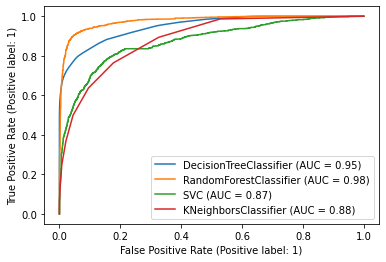

In [217]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Testing Data

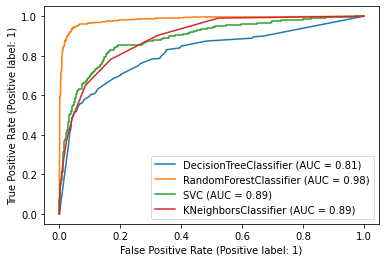

In [218]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

In [219]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 10, min_samples_leaf= 1, min_samples_split= 2)
clf_dt.fit(X_train_ns,y_train_ns)


DecisionTreeClassifier(max_depth=10)

In [220]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'entropy', max_depth = 15, min_samples_leaf= 2, min_samples_split= 3,n_estimators= 10)
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10)

In [221]:
# update our model and train again for new score 
svc=SVC(C=20,gamma=0.02)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.02)

In [222]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 9)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

## AUC-ROC Curve for Training Data With Hyperparameter tuning

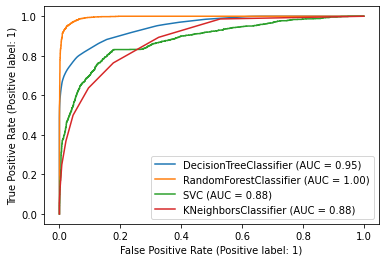

In [223]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Test Data With Hyperparameter Tuning

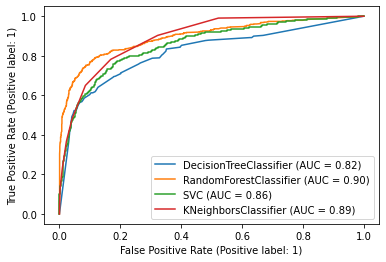

In [224]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

## For this particular model According to the AUC-ROC curve with hyperparameter tuning KNeighborsClassifier is the best Model as the training score with hyperparameter is 88% and the testing score is 89% so we select KNeighborsClassifier as the best model for this particular model.

## Saving the best Model

In [225]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(clf_knn , open ('reg_model' , 'wb'))

# 2nd Model [predicting : predict how much rainfall could be there.]

## Once again importing dataset

In [358]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [359]:
#import the dataset
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Pre-Processing

In [360]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [361]:
df.shape

(8425, 23)

## Imputing Null values by Using simple Imputer

In [362]:
from sklearn.impute import SimpleImputer

In [363]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[[ 'WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']])
df[['WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow' ]] = imputer.transform(df[[ 'WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [364]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']])
df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm' ]] = imputer.transform(df[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [365]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Dropping Duplicates Values

In [366]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3674,2015-10-20,Williamtown,13.1,31.6,0.000000,6.400000,11.100000,E,33.0,N,...,67.0,37.0,1021.4,1016.4,1.000000,1.000000,21.5,30.3,No,No
3675,2015-10-21,Williamtown,16.6,34.1,0.000000,6.600000,9.900000,NNW,44.0,NW,...,54.0,39.0,1014.7,1010.6,1.000000,5.000000,24.7,30.2,No,Yes
3676,2015-10-22,Williamtown,17.5,26.3,19.800000,7.800000,7.632205,SW,67.0,N,...,94.0,45.0,1012.4,1008.3,8.000000,6.000000,18.6,25.6,Yes,No
3677,2015-10-23,Williamtown,14.7,21.4,2.805913,5.389395,7.632205,S,59.0,WSW,...,90.0,48.0,1021.4,1020.9,7.000000,5.000000,15.6,20.3,No,No
3678,2015-10-24,Williamtown,11.0,22.5,2.805913,5.389395,7.632205,E,35.0,NW,...,65.0,60.0,1024.5,1021.4,4.566622,4.503183,18.4,21.4,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,2012-01-25,Melbourne,20.3,25.0,0.000000,11.600000,7.300000,S,39.0,S,...,77.0,60.0,1015.2,1014.0,8.000000,2.000000,20.8,23.8,No,No
6144,2012-01-26,Melbourne,16.1,24.5,0.000000,4.400000,12.400000,S,50.0,S,...,67.0,55.0,1018.5,1016.9,4.566622,4.503183,18.9,23.7,No,No
6145,2012-01-27,Melbourne,16.6,30.7,2.805913,8.000000,13.000000,SSE,39.0,WSW,...,69.0,55.0,1016.9,1013.5,4.566622,4.503183,20.5,26.3,No,No
6146,2012-01-28,Melbourne,20.0,30.4,2.805913,8.200000,12.100000,SSE,37.0,SW,...,64.0,55.0,1012.7,1009.2,4.566622,4.503183,24.1,27.4,No,No


In [235]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [236]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [367]:
df.shape

(8425, 23)

In [368]:
print(pd.Timestamp.min)

1677-09-21 00:12:43.145224193


In [369]:
print(pd.Timestamp.max)

2262-04-11 23:47:16.854775807


In [371]:
df.Date = pd.to_datetime(df.Date, errors = 'coerce')

In [372]:
print(df.Date)

0      2008-12-01
1      2008-12-02
2      2008-12-03
3      2008-12-04
4      2008-12-05
          ...    
8420   2017-06-21
8421   2017-06-22
8422   2017-06-23
8423   2017-06-24
8424   2017-06-25
Name: Date, Length: 8425, dtype: datetime64[ns]


## Adding Extra new columns that is DAY,MONTH,YEAR

In [373]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [374]:
df['Day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [375]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [376]:
#Removing unncessary columns
df.drop([ 'Date'],axis=1,inplace = True)

## Applying Label Encoder to categorical columns

In [377]:
from sklearn.preprocessing import LabelEncoder

In [378]:
le=LabelEncoder()
df1=le.fit_transform(df['Location'])
pd.Series(df1)

0       1
1       1
2       1
3       1
4       1
       ..
8420    9
8421    9
8422    9
8423    9
8424    9
Length: 8425, dtype: int32

In [379]:
df['Location']=df1

In [380]:
df2=le.fit_transform(df['WindGustDir'])
pd.Series(df1)
df['WindGustDir']=df2

In [381]:
df3=le.fit_transform(df['WindDir9am'])
pd.Series(df1)
df['WindDir9am']=df3

In [382]:
df4=le.fit_transform(df['WindDir3pm'])
pd.Series(df1)
df['WindDir3pm']=df4

In [383]:
df5=le.fit_transform(df['RainToday'])
pd.Series(df1)
df['RainToday']=df5

In [384]:
df6=le.fit_transform(df['RainTomorrow'])
pd.Series(df1)
df['RainTomorrow']=df6

In [385]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Day                int64
month              int64
year               int64
dtype: object

## Plotting the heatmap to observe Co-relation

In [386]:
corr=df.corr()
corr.shape

(25, 25)

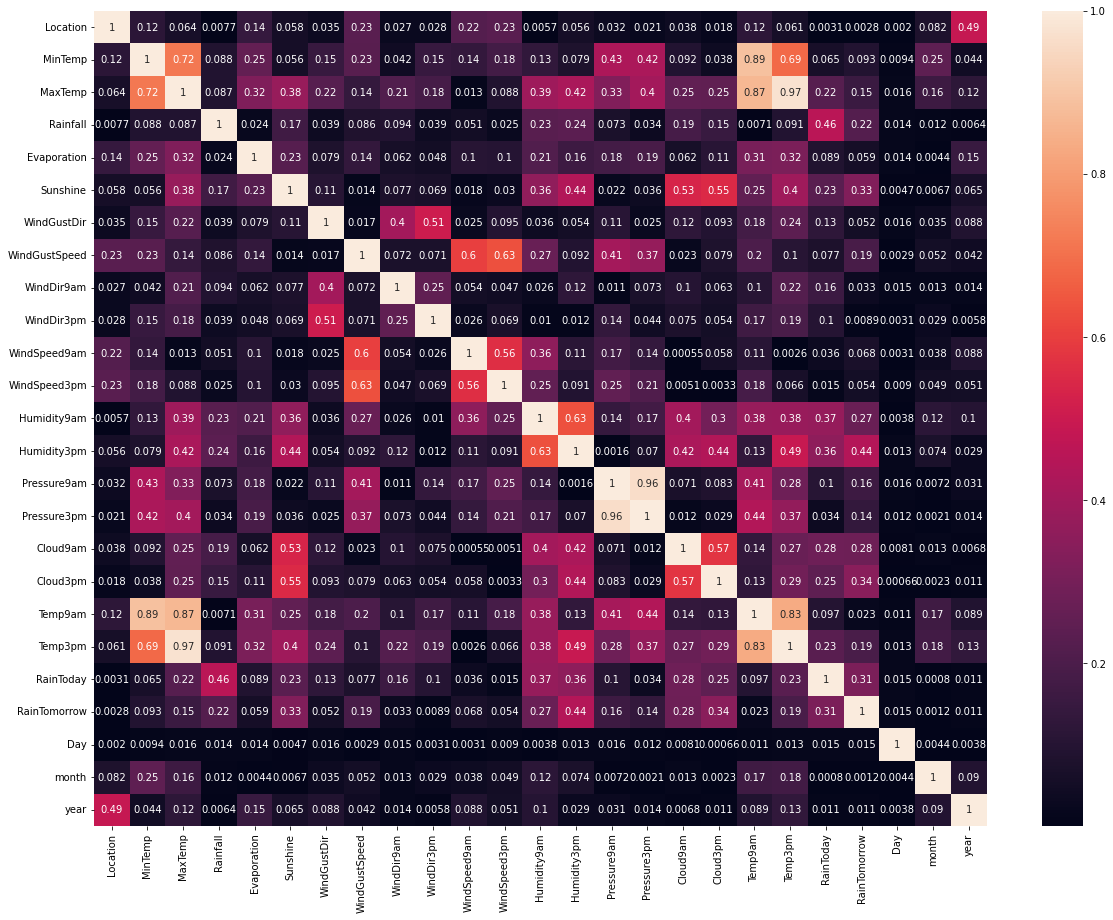

In [387]:
corr=df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

## So from above heat map we observe and suspect that there is a problem of muiti-colinearity exist as temp9am vs Mintemp , Temp9am vs Maxtemp , Temp3pm VS Maxtemp , Temp3pm VS Temp9am and pressure9am vs Pressure3pm are very highly co-related so we will make sure by scatter plot and if we find trend we will drop that column that contrubute less to our label

## Separating Feature and Label 

In [388]:
X = df.drop(['Rainfall','MinTemp','MaxTemp','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis = 1)
y = df['Rainfall']

## Plotting Scatter plot to see relation between feature and label

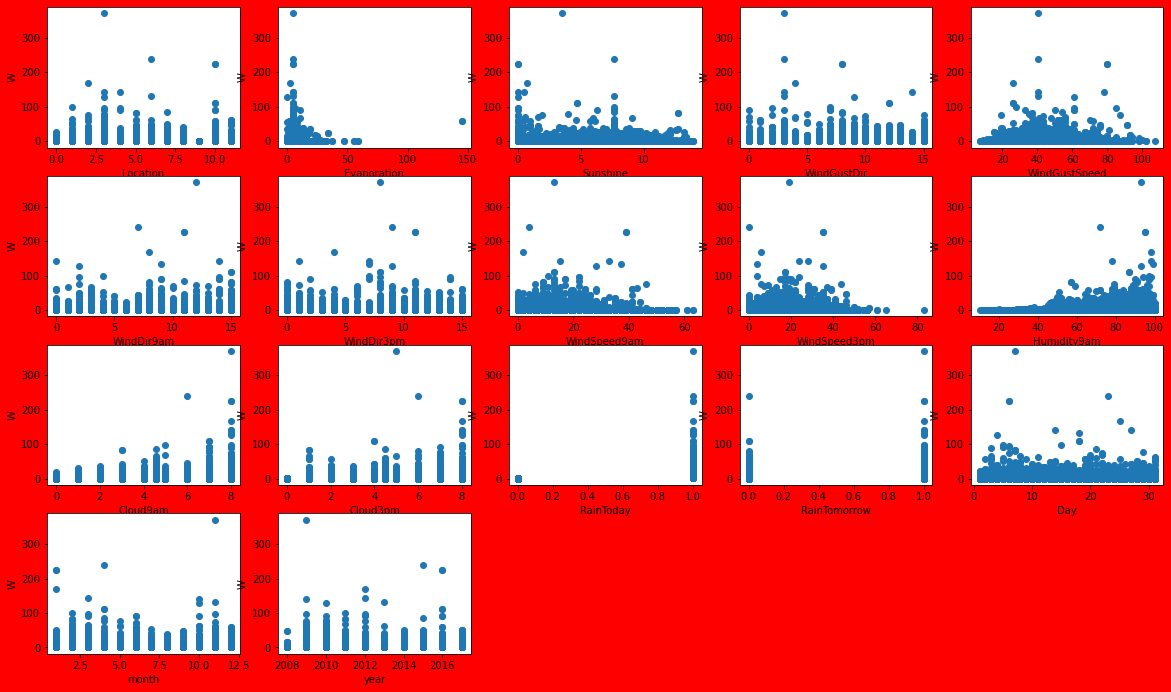

In [389]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see relation between feature and label

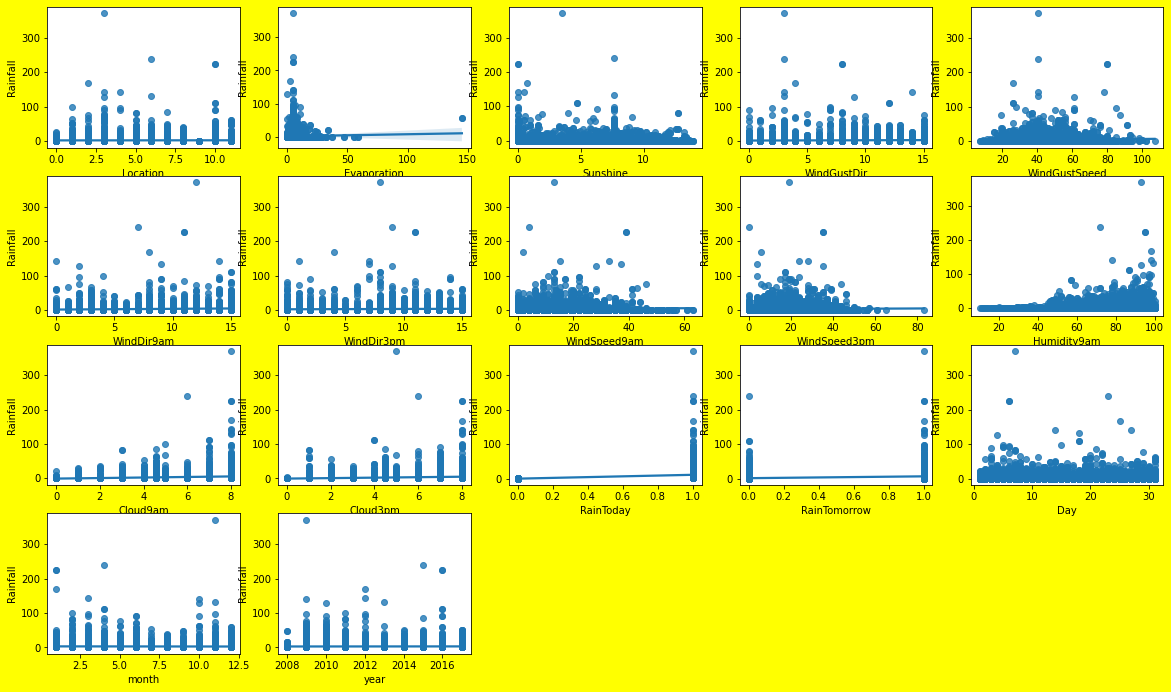

In [390]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From above Scatter plot and Regression Plot we observe Evaporation,raintoday,raintomorrow are slightly positively corelated and rest of the feature are netrual with our label (Rainfall)

## Plotting Box plot to see outliers are present are not

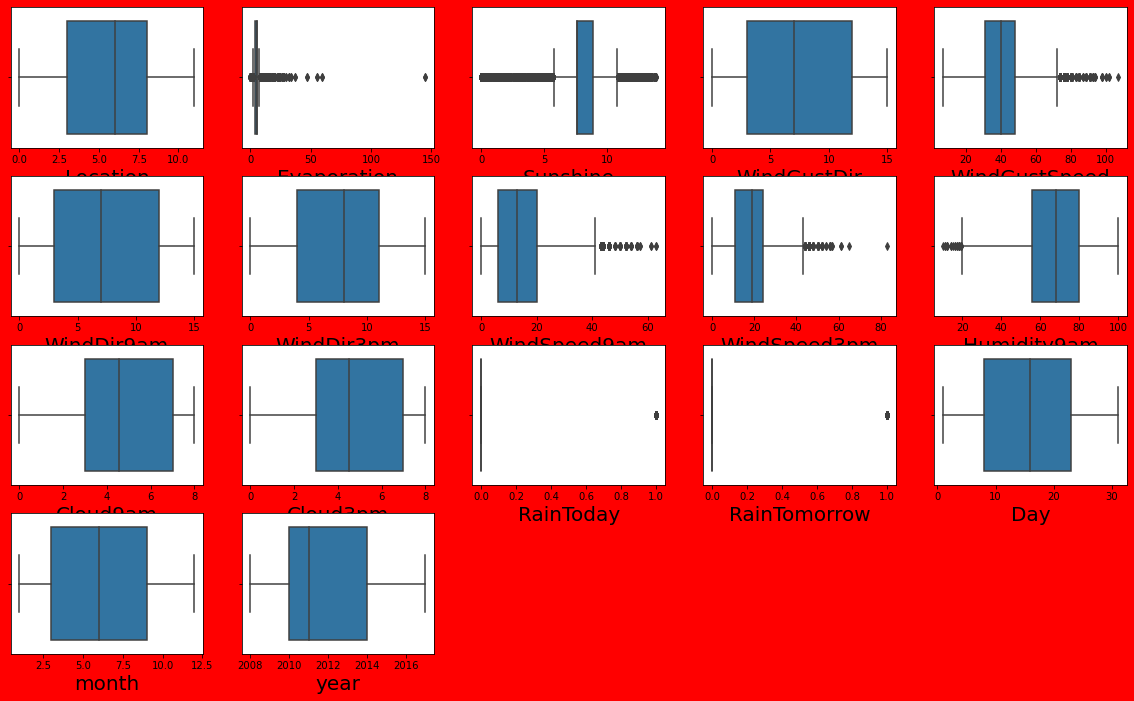

In [391]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 25:
        plt.subplot (5,5,graph)
        ax = sns.boxplot(X[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## From above box plot we observe most of the feature having the outliers and we going to treat it with Z score

### Treating Outliers with Z-score Method

In [392]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [393]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.5 ).all(axis=1)

df1 = df[filtering_entry]

df1.describe()



,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
count,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,...,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,5.755550,13.038633,23.875240,2.533409,5.116231,7.913236,7.238671,38.650935,7.320373,7.811507,...,1015.542001,4.479610,4.393886,17.643306,22.486867,0.230921,0.218311,15.711283,6.388809,2012.141994
std,3.187685,5.417733,5.961381,9.077133,2.151861,2.436928,4.696788,11.927601,4.577981,4.405911,...,5.999621,2.421254,2.273814,5.577861,5.788925,0.421450,0.413127,8.776158,3.419119,2.483511
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.600000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,3.000000,9.100000,19.500000,0.000000,4.000000,7.632205,3.000000,30.000000,3.000000,4.000000,...,1011.900000,3.000000,3.000000,13.700000,18.300000,0.000000,0.000000,8.000000,3.000000,2010.000000
50%,6.000000,13.193305,23.400000,0.000000,5.389395,7.632205,7.000000,39.000000,7.000000,8.000000,...,1015.236075,4.566622,4.503183,17.700000,22.100000,0.000000,0.000000,16.000000,6.000000,2012.000000
75%,8.000000,17.200000,28.000000,1.200000,5.389395,9.000000,12.000000,46.000000,12.000000,11.000000,...,1019.000000,7.000000,6.000000,21.800000,26.200000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,27.800000,45.500000,371.000000,15.000000,13.900000,15.000000,74.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,36.800000,44.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


## Scaling the data

In [395]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF

In [396]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.524973,Location
1,1.139055,Evaporation
2,1.749896,Sunshine
3,1.552279,WindGustDir
4,2.200697,WindGustSpeed
5,1.259550,WindDir9am
6,1.375435,WindDir3pm
7,1.935687,WindSpeed9am
8,1.903854,WindSpeed3pm
9,1.822448,Humidity9am


## # finding correlation between feature n lable using CORR method

In [397]:
#  (code type      --   feature corrwith label)

df.drop('Rainfall' , axis =1 ).corrwith (df.Rainfall)

Location         0.007693
MinTemp          0.087684
MaxTemp         -0.087451
Evaporation      0.023517
Sunshine        -0.169432
WindGustDir      0.038812
WindGustSpeed    0.086000
WindDir9am       0.093821
WindDir3pm       0.038560
WindSpeed9am     0.050631
WindSpeed3pm     0.024791
Humidity9am      0.228800
Humidity3pm      0.235444
Pressure9am     -0.072668
Pressure3pm     -0.033649
Cloud9am         0.185444
Cloud3pm         0.150760
Temp9am         -0.007083
Temp3pm         -0.090687
RainToday        0.461106
RainTomorrow     0.220021
Day             -0.013760
month           -0.012244
year             0.006435
dtype: float64

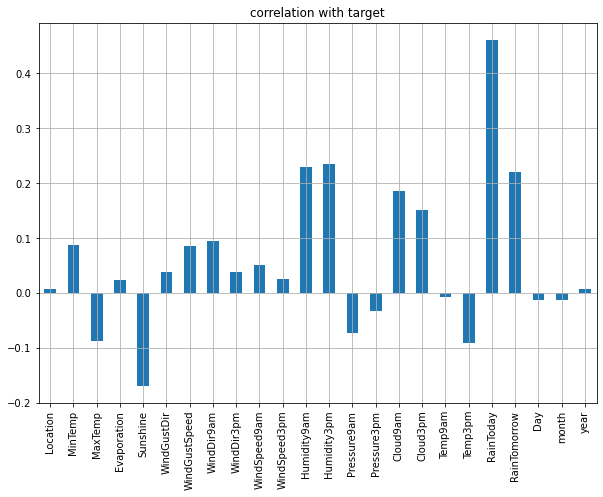

In [398]:
# convert above numbers into graph for better understanding
df.drop('Rainfall' , axis = 1).corrwith (df.Rainfall).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

In [399]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

## Feature selection with SelectKBest

In [400]:
# selecting 14 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

In [401]:
#select best feature
# selecting 10 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

best_feature = SelectKBest(score_func=f_classif , k=10)

fit = best_feature.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_column = pd.DataFrame(X.columns)

feature_scores = pd.concat ([df_column , df_scores ] , axis =1)

feature_scores.columns=['Feature_Name' , 'Scores']

print (feature_scores.nlargest (10 , 'Scores'))

     Feature_Name     Scores
12      RainToday        inf
1     Evaporation  18.500523
9     Humidity9am   8.969918
13   RainTomorrow   6.919983
10       Cloud9am   5.013564
2        Sunshine   4.785984
11       Cloud3pm   4.260598
5      WindDir9am   2.410364
3     WindGustDir   2.107642
4   WindGustSpeed   2.064205


## we selected top 10 features from feature selection technique

In [402]:
#Model BUilding
new_X = df[['RainToday','Evaporation','Humidity9am', 'RainTomorrow','Cloud9am','Sunshine','Cloud3pm','WindDir9am','WindGustDir','WindGustSpeed']]

In [403]:
scalar = StandardScaler()
X_scalarr = scalar.fit_transform(new_X)

#  GradientBoostingRegressor Model

In [404]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


### Best Random State

In [405]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalarr,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 61.938892404126555 RandomState 0
Testing Score 45.804362356486294 RandomState 0


MAXINING TESTING SCORE 45.804362356486294 ON RANDOM STATE OF 0
Training Score 68.11139261897665 RandomState 1
Testing Score 25.659208851343895 RandomState 1


Training Score 57.699268996656905 RandomState 2
Testing Score 29.924733163284735 RandomState 2


Training Score 70.74385108232715 RandomState 3
Testing Score 12.27729258647049 RandomState 3


Training Score 58.263656483861496 RandomState 4
Testing Score 41.72602911469351 RandomState 4


Training Score 61.672038167164956 RandomState 5
Testing Score 36.992679412851295 RandomState 5


Training Score 51.17146588196873 RandomState 6
Testing Score 58.43859935002562 RandomState 6


MAXINING TESTING SCORE 58.43859935002562 ON RANDOM STATE OF 6
Training Score 65.53315749929722 RandomState 7
Testing Score 40.66811913244417 RandomState 7


Training Score 61.416875622739695 RandomState 8
Testing Score 25.37519782215416 RandomState 8


Training Sc

In [406]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 60.920816760884875 ON RANDOM STATE OF 69


### Training the model

In [407]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scalarr,y,test_size=0.25,random_state=69)

In [408]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)

GradientBoostingRegressor()

In [409]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [410]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6324621250054407


In [411]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [412]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6092069238877803


## Model Score
* Training Score = 63.24621250054407 %
* Testing Score = 60.92069238877803 %

## Hyperparameter tuning for GradientBoostingRegressor

In [413]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [414]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [415]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [416]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [417]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [418]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 4,
 min_samples_split= 6,
 n_estimators= 100)

In [419]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, min_samples_split=6)

In [420]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [421]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6911749998773149


In [422]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [423]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6215845442023626


## Model Score after Hyperparameter Tuning
* Training Score = 69.11749998773149 %
* Testing Score = 62.15845442023626 %

## Cross Vaildation for GradientBoostingRegressor

In [424]:
#Cross Vaildation
training=gbdt_clf.score(X_train,y_train)
testing=gbdt_clf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(gbdt_clf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -0.16675544078398086 and the R2 score for Training is 0.6911749998773149 and R2 score for the Testing is0.6215845442023626


At cross fold 3 the cv score is 0.25905619420610737 and the R2 score for Training is 0.6911749998773149 and R2 score for the Testing is0.6215845442023626


At cross fold 4 the cv score is 0.2379532408927642 and the R2 score for Training is 0.6911749998773149 and R2 score for the Testing is0.6215845442023626


At cross fold 5 the cv score is 0.345740075587193 and the R2 score for Training is 0.6911749998773149 and R2 score for the Testing is0.6215845442023626


At cross fold 6 the cv score is 0.28587051645036027 and the R2 score for Training is 0.6911749998773149 and R2 score for the Testing is0.6215845442023626


At cross fold 7 the cv score is 0.373987974211141 and the R2 score for Training is 0.6911749998773149 and R2 score for the Testing is0.6215845442023626


At cross fold 8 the cv score is 0.32039447358303735 and the R2 score

## Cross-Validation Score
* Cross-Validation Score at cv=7 is 37.3987974211141 %
* R2 Score for Training Score = 69.11749998773149 %
* R2 Score for Testing Testing Score = 62.15845442023626 %

# RandomForestRegressor Model

In [431]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Best Random State

In [432]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalarr,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 91.12295548849814 RandomState 0
Testing Score 40.06581584342808 RandomState 0


MAXINING TESTING SCORE 40.06581584342808 ON RANDOM STATE OF 0
Training Score 93.06918721785549 RandomState 1
Testing Score 28.196647982414202 RandomState 1


Training Score 92.5655975243002 RandomState 2
Testing Score 34.30964952320262 RandomState 2


Training Score 92.87056187812983 RandomState 3
Testing Score 32.43068450309603 RandomState 3


Training Score 91.68045335823946 RandomState 4
Testing Score 58.63818556271402 RandomState 4


MAXINING TESTING SCORE 58.63818556271402 ON RANDOM STATE OF 4
Training Score 90.02216206759532 RandomState 5
Testing Score 57.97894142929583 RandomState 5


Training Score 92.03819998935775 RandomState 6
Testing Score 59.622849635319874 RandomState 6


MAXINING TESTING SCORE 59.622849635319874 ON RANDOM STATE OF 6
Training Score 91.55539166521575 RandomState 7
Testing Score 42.22233720788429 RandomState 7


Training Score 93.18401033593736 RandomState 8
Testi

In [433]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 69.41493520538053 ON RANDOM STATE OF 15


### Training the model

In [434]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scalarr,y,test_size=0.25,random_state=15)

In [435]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [436]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [437]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9023831011936633


In [438]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [439]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6694819883406362


## Model Score
* Training Score = 90.23831011936633 %
* Testing Score = 66.94819883406362 %

## Hyperparameter tuning for Random Forest

In [440]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [441]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [442]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [443]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 11}


In [444]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'poisson', max_depth= 15, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 11)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=15, max_features='auto',
                      min_samples_split=11)

In [445]:
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  70.15626665280466


In [446]:
pred_decision=rf.predict(X_test)
from sklearn.metrics import r2_score
rfs = r2_score(y_test,pred_decision)

In [447]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 64.06578459435688


## Model Score after Hyperparameter Tuning
* Training Score = 70.15626665280466 %
* Testing Score = 64.06578459435688 %

## Cross Validation for Random Forest

In [448]:
#Cross Vaildation
training=rf.score(X_train,y_train)
testing=rf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.2127460145642433 and the R2 score for Training is 0.7015626665280466 and R2 score for the Testing is0.6406578459435689


At cross fold 3 the cv score is 0.33033870089978046 and the R2 score for Training is 0.7015626665280466 and R2 score for the Testing is0.6406578459435689


At cross fold 4 the cv score is 0.27551664794786945 and the R2 score for Training is 0.7015626665280466 and R2 score for the Testing is0.6406578459435689


At cross fold 5 the cv score is 0.4108990027563375 and the R2 score for Training is 0.7015626665280466 and R2 score for the Testing is0.6406578459435689


At cross fold 6 the cv score is 0.3927950143069013 and the R2 score for Training is 0.7015626665280466 and R2 score for the Testing is0.6406578459435689


At cross fold 7 the cv score is 0.3922074291682452 and the R2 score for Training is 0.7015626665280466 and R2 score for the Testing is0.6406578459435689


At cross fold 8 the cv score is 0.3191240912308025 and the R2 score 

## Cross-Validation Score
* Cross-Validation Score at cv=5 is 41.08990027563375 %
* R2 Score for Training Score = 70.15626665280466  %
* R2 Score for Testing Testing Score = 64.06578459435689 %

# Linear Regression Model

In [461]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Best Random State

In [462]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalarr,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 21.691553612794856 RandomState 0
Testing Score 30.66354862291536 RandomState 0


MAXINING TESTING SCORE 30.66354862291536 ON RANDOM STATE OF 0
Training Score 22.73009582824017 RandomState 1
Testing Score 25.864789360517506 RandomState 1


Training Score 24.980013947536005 RandomState 2
Testing Score 19.741020350501525 RandomState 2


Training Score 23.80794992577606 RandomState 3
Testing Score 22.07929895469253 RandomState 3


Training Score 22.48368184313202 RandomState 4
Testing Score 28.140422676942634 RandomState 4


Training Score 23.360594327966133 RandomState 5
Testing Score 23.30188307013581 RandomState 5


Training Score 22.561458797123347 RandomState 6
Testing Score 26.37013966269738 RandomState 6


Training Score 23.490092674697504 RandomState 7
Testing Score 23.050926372489975 RandomState 7


Training Score 25.679697948529622 RandomState 8
Testing Score 18.209960426757597 RandomState 8


Training Score 26.950726165810778 RandomState 9
Testing Score 17.5519702

In [463]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 38.55987686459661 ON RANDOM STATE OF 144


### Training the model

In [464]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_scalarr,y,test_size=0.25,random_state=144)

In [465]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [466]:
#training score
regression.score(X_train,y_train)  

0.21175910319268165

In [467]:
#testing score
regression.score(X_test,y_test) 

0.3855987686459661

## Model Score
* Training Score = 21.175910319268165 %
* Testing Score = 38.55987686459661 %

In [468]:
y_pred=regression.predict(X_test)
y_pred

array([ 0.78018891,  9.90788993, -0.77435197, ..., 10.03543657,
       -0.22679082, -0.43998664])

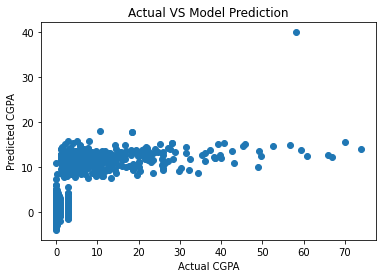

In [469]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual VS Model Prediction')
plt.show()

## Checking MAE , MSE & RMSE scores

In [470]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [471]:
# again predict 
y_pred = regression.predict(X_test)

In [472]:
#MAE
mean_absolute_error(y_test,y_pred)

2.8625411526578195

In [473]:
#MSE
mean_squared_error(y_test,y_pred)

32.59985061507917

In [474]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

5.709627887619225

## Scores
* MAE SCORE = 2.8625411526578195
* MSE SCORE = 32.59985061507917
* RMSE SCORE = 5.709627887619225

## LASSO MODEL

In [475]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [476]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100, normalize = True)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100, normalize=True)

In [477]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

6.119476404668955e-05

In [478]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=6.119476404668955e-05)

In [479]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.38560275129137545

## RIDGE MODEL

In [480]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [481]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.011

In [482]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.011)

In [483]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.3855988991238586

## SCORES
* LASSO SCORES = 38.560275129137545 %
* RIDGE SCORES = 38.55988991238586 %

## Cross-Validation For Linear Regression

In [484]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.08322565842256596 and the R2 score for Training is 0.21175910319268165 and R2 score for the Testing is0.3855987686459661


At cross fold 3 the cv score is 0.23700509022177427 and the R2 score for Training is 0.21175910319268165 and R2 score for the Testing is0.3855987686459661


At cross fold 4 the cv score is 0.19676981833472354 and the R2 score for Training is 0.21175910319268165 and R2 score for the Testing is0.3855987686459661


At cross fold 5 the cv score is 0.24096430184063075 and the R2 score for Training is 0.21175910319268165 and R2 score for the Testing is0.3855987686459661


At cross fold 6 the cv score is 0.23940975027988529 and the R2 score for Training is 0.21175910319268165 and R2 score for the Testing is0.3855987686459661


At cross fold 7 the cv score is 0.22345009293456172 and the R2 score for Training is 0.21175910319268165 and R2 score for the Testing is0.3855987686459661


At cross fold 8 the cv score is 0.25039224446096653 and th

## Cross-Validation Score
* Cross-Validation Score at cv=8 is 25.039224446096653 %
* R2 Score for Training Score = 21.175910319268165  %
* R2 Score for Testing Testing Score = 38.55987686459661 %

# KNN MODEL

In [485]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

###  Best Random State

In [486]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalarr,y,test_size=0.25,random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(X_train,y_train)
    
    pred=knn.predict(X_train)
    training=knn.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=knn.predict(X_test)
    testing=knn.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 51.929211845663126 RandomState 0
Testing Score 25.610821760578606 RandomState 0


MAXINING TESTING SCORE 25.610821760578606 ON RANDOM STATE OF 0
Training Score 54.689133620675264 RandomState 1
Testing Score 11.453056886195212 RandomState 1


Training Score 49.154959637245895 RandomState 2
Testing Score 29.915658663892618 RandomState 2


MAXINING TESTING SCORE 29.915658663892618 ON RANDOM STATE OF 2
Training Score 58.810675346432504 RandomState 3
Testing Score 21.914544415629532 RandomState 3


Training Score 49.460780286785855 RandomState 4
Testing Score 29.0458203002827 RandomState 4


Training Score 46.92899411243092 RandomState 5
Testing Score 40.244194130147235 RandomState 5


MAXINING TESTING SCORE 40.244194130147235 ON RANDOM STATE OF 5
Training Score 47.137100076522685 RandomState 6
Testing Score 33.95526385002938 RandomState 6


Training Score 52.23613351289173 RandomState 7
Testing Score 32.61489557751983 RandomState 7


Training Score 53.88868892331449 RandomSt

In [487]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 41.66418176604949 ON RANDOM STATE OF 46


### Training the model

In [488]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scalarr,y,test_size=0.25,random_state=46)

In [489]:
# initiate GradientBoostingClassifier
knn= KNeighborsRegressor()
knn.fit(X_train , y_train)

KNeighborsRegressor()

In [490]:
 # model prediction on training dataset
y_pred = knn.predict(X_train)

In [491]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.49154066375838024


In [492]:
# model prediction on testing datadet
pred = knn.predict(X_test)

In [493]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.4166418176604949


## Model Score
* Training Score = 49.154066375838024 %
* Testing Score = 41.66418176604949 %

## Hyperparameter tuning for KNN

In [494]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [495]:
# define parameters
parameterss={'algorithm':['kd_tree' , 'brute'],
           'leaf_size':[3,5,10,15,30],
           'n_neighbors':[3,15,7,50,20]}

In [496]:
knn=KNeighborsRegressor()
clf=clf=GridSearchCV(knn,parameterss)
clf.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 10, 15, 30],
                         'n_neighbors': [3, 15, 7, 50, 20]})

In [497]:
#print best parameters
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 50}


In [502]:
#reassign best parameters
knn=KNeighborsRegressor(algorithm= 'kd_tree', leaf_size= 5, n_neighbors= 5)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=5)

In [503]:
print ('Training R2 Score: ' ,knn.score(X_train,y_train)*100)

Training R2 Score:  49.15997640619908


In [504]:
pred_decision=knn.predict(X_test)

In [505]:
from sklearn.metrics import r2_score
rfs = r2_score(y_test,pred_decision)
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 41.652912088399255


## Model Score after Hyperparameter Tuning
* Training Score = 49.15997640619908 %
* Testing Score = 41.652912088399255 %

In [506]:
#Cross Vaildation
training=knn.score(X_train,y_train)
testing=knn.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(knn,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.004523672086053643 and the R2 score for Training is 0.4915997640619908 and R2 score for the Testing is0.4165291208839925


At cross fold 3 the cv score is 0.05918456545678789 and the R2 score for Training is 0.4915997640619908 and R2 score for the Testing is0.4165291208839925


At cross fold 4 the cv score is 0.0017773859119621926 and the R2 score for Training is 0.4915997640619908 and R2 score for the Testing is0.4165291208839925


At cross fold 5 the cv score is 0.10924840210760936 and the R2 score for Training is 0.4915997640619908 and R2 score for the Testing is0.4165291208839925


At cross fold 6 the cv score is 0.06928978821783649 and the R2 score for Training is 0.4915997640619908 and R2 score for the Testing is0.4165291208839925


At cross fold 7 the cv score is 0.11822882522490427 and the R2 score for Training is 0.4915997640619908 and R2 score for the Testing is0.4165291208839925


At cross fold 8 the cv score is 0.12902326517777024 and the R

## Cross-Validation Score
* Cross-Validation Score at cv=8 is 12.902326517777024  %
* R2 Score for Training Score = 49.15997640619908  %
* R2 Score for Testing Testing Score = 41.65291208839925 %

# # All model score after hyperparameter tuning

** Gradient Boosting Regressor Model

    Cross-Validation Score at cv=7 is 37.3987974211141 %
    R2 Score for Training Score = 69.11749998773149 %
    R2 Score for Testing Testing Score = 62.15845442023626 %


** Random Forest Regressor Model

    Cross-Validation Score at cv=5 is 41.08990027563375 %
    R2 Score for Training Score = 70.15626665280466 %
    R2 Score for Testing Testing Score = 64.06578459435689 %


** Linear Regression Model 

    Cross-Validation Score at cv=8 is 25.039224446096653 %
    R2 Score for Training Score = 21.175910319268165 %
    R2 Score for Testing Testing Score = 38.55987686459661 %


** GradientBoostingRegressor ModelKNN MODEL

    Cross-Validation Score at cv=8 is 12.902326517777024 %
    R2 Score for Training Score = 49.15997640619908 %
    R2 Score for Testing Testing Score = 41.65291208839925 %

## From Above all Model Score we select Random Forest Model For this perticular problem as its Training sore is 70.15% and Testing Score is 64.06% .

# Saving the Best model

In [507]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(rf , open ('reg_model' , 'wb'))